In [1]:
import torch
from svpg.utils.utils import load_algo_data
from svpg.visu.state_visitation import plot_state_visitation

from omegaconf import OmegaConf

In [2]:
config = OmegaConf.create({
    "algorithm": {
        "seed": 4,
        "n_evals": 100,
    },
    "gym_env": {
        "classname": "svpg.agents.env.make_gym_env",
        "env_name": "CartPole-v1",
        "max_episode_steps": 500,
    }
})

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
env_name = "CartPole-v1"
directory = f"../archives/{env_name}/22-05-07/11-39-36/"

a2c_agents, _, a2c_rewards = load_algo_data(directory + "A2C-independant", device)
svpg_agents, _, svpg_rewards = load_algo_data(directory + "A2C-SVPG", device)
svpga_agents, _, svpga_rewards = load_algo_data(directory + "A2C-SVPG_annealed", device)


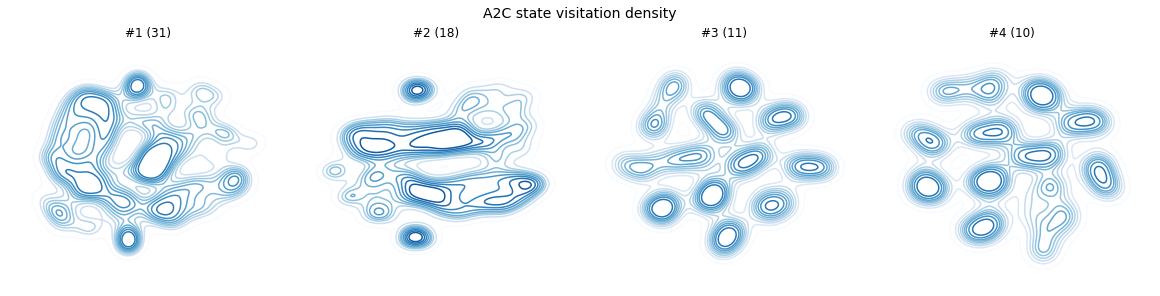

In [4]:
plot_state_visitation(config, a2c_agents, a2c_rewards, "A2C", device=device, cmap="Blues", save=False)


In [6]:
plot_state_visitation(config, svpg_agents, svpg_rewards, "SVPG", device=device, cmap="Reds", save=False)


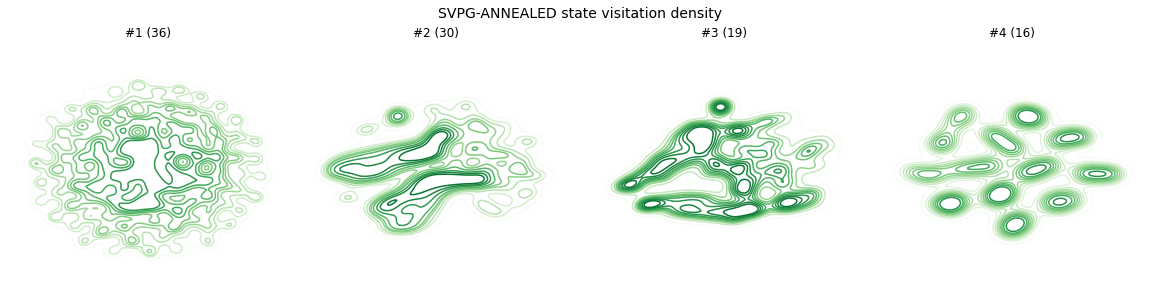

In [ ]:
plot_state_visitation(config, svpga_agents, svpga_rewards, "SVPG-ANNEALED", device=device, cmap="Greens", save=False)
